In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/duypd/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/duypd/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
data = pd.read_excel('DU_LIEU_TEST_Q12.xlsx')
data.head(10)

/home/duypd/ThisPC-DuyPC/khangta-thesis/.venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,TRICH_YEU,NAME,HINHTHUC
0,Kết quả kiểm tra các hộ có phương án được phê ...,NaN,Báo cáo
1,V/v xin phép cho người lao động đi nước ngoài ...,NaN,Công văn
2,phê duyệt điều chỉnh bổ sung dự toán chi phí b...,NaN,Quyết định
3,BC hoàn thành thi công xây dựng công trình Sửa...,NaN,Báo cáo
4,BC hoàn thành thi công xây dựng công trình Sửa...,NaN,Báo cáo
5,phê duyệt quyết toán chi phí thực hiện bồi thư...,NaN,Quyết định
6,BC hoàn thành thi công xây dựng công trình Sửa...,NaN,Báo cáo
7,BC hoàn thành thi công xây dựng công trình Sửa...,NaN,Báo cáo
8,Kế hoạch tổ chức các hoạt động Tháng cao điểm ...,NaN,Công văn
9,Yêu cầu cung cấp chứng cứ&comma; đồ vật&comma;...,NaN,Công văn


In [29]:
hinhtuc_counts = data['HINHTHUC'].value_counts()
hinhtuc_counts

HINHTHUC
Công văn                        513233
Quyết định                      168045
Báo cáo                         118559
Thông báo                        88425
Kế hoạch                         52333
Tờ trình                         34135
Thư mời                          27219
Đơn                              12688
Giấy mời                         10309
Văn bản khác                      6788
Phiếu chuyển                      5015
Biên bản                          1958
Thư xin lỗi                       1918
Nghị quyết                        1203
Chương trình                       863
Danh sách                          708
Chỉ thị                            539
Phiếu báo                          534
Giấy phép thi công                 520
Giấy triệu tập                     337
Hợp đồng                           332
Quyết định cưỡng chế               290
Quyết định xử phạt                 254
Hướng dẫn                          242
Giấy xác nhận                      219
Thông tư        

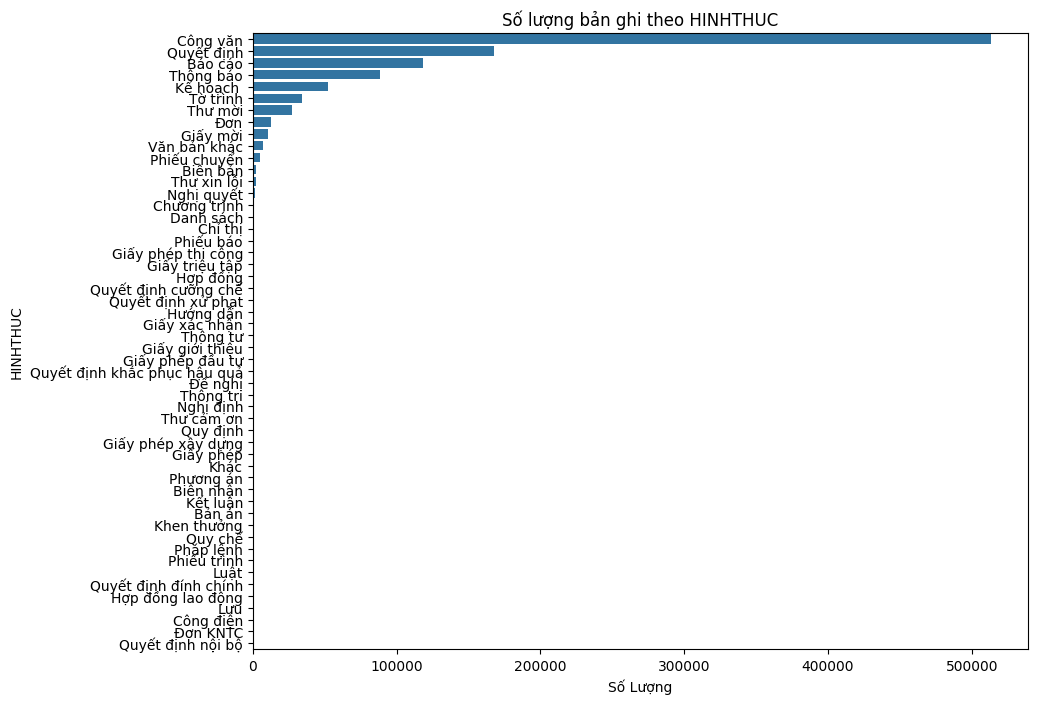

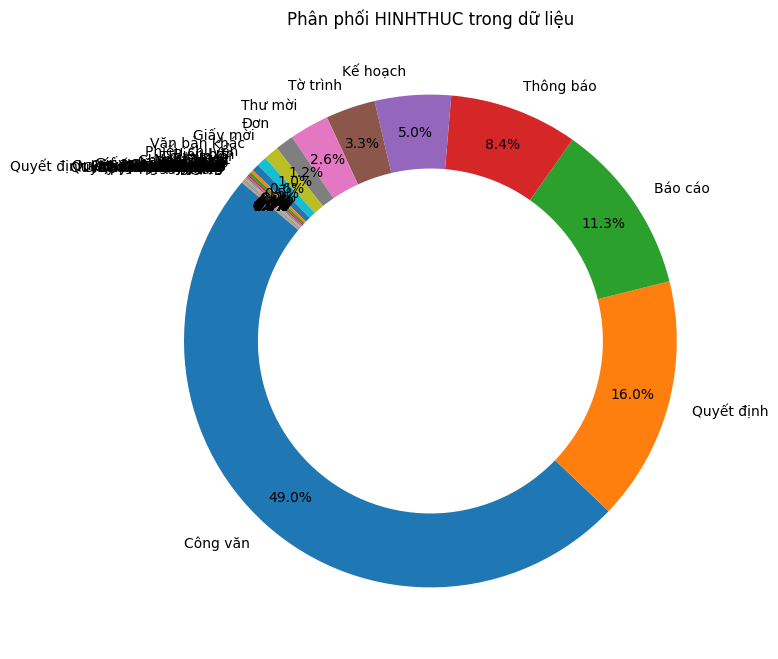

In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(x=hinhtuc_counts.values, y=hinhtuc_counts.index)
plt.xlabel('Số Lượng')
plt.ylabel('HINHTHUC')
plt.title('Số lượng bản ghi theo HINHTHUC')
plt.show()

plt.figure(figsize=(10, 8))
plt.pie(hinhtuc_counts, labels=hinhtuc_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Phân phối HINHTHUC trong dữ liệu')
plt.show()

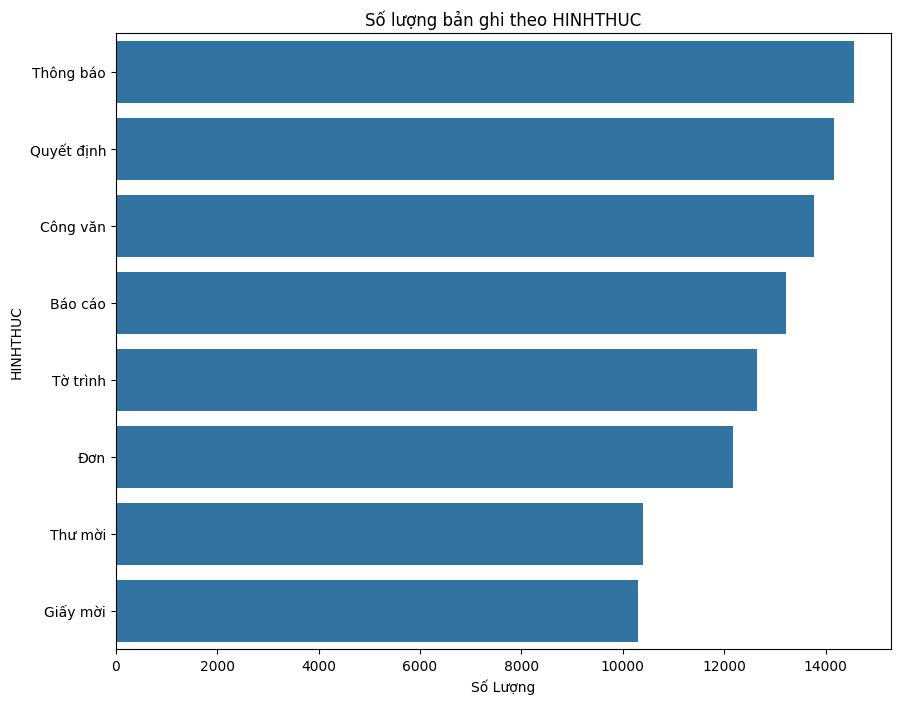

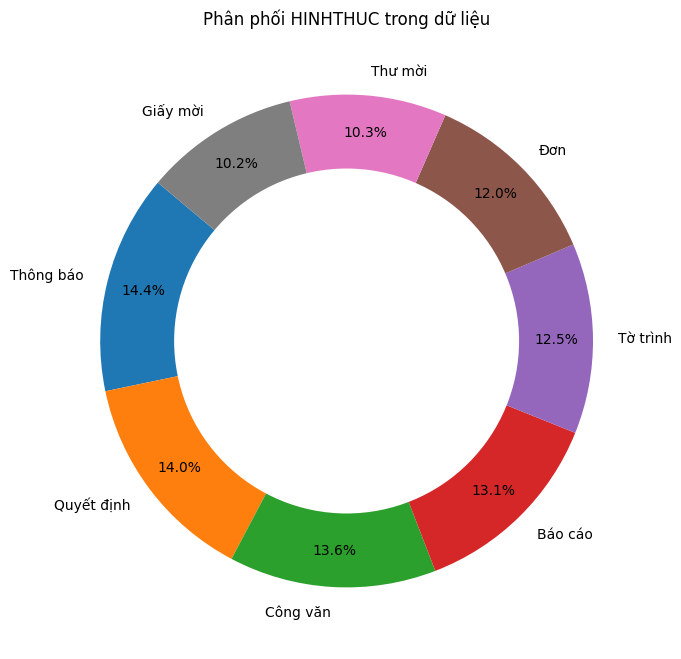

In [31]:
classes_to_keep = [
    'Công văn',
    'Quyết định',
    'Báo cáo',
    'Thông báo',
    'Kế hoạch',
    'Tờ trình',
    'Thư mời',
    'Đơn',
    'Giấy mời'
]
sampled_dfs = []

for category in classes_to_keep:
    # Lọc DataFrame cho phân loại hiện tại
    category_df = data[data['HINHTHUC'] == category]
    
    # Tạo một sample_size ngẫu nhiên từ 10000 đến 15000
    sample_size = random.randint(10000, 15000)
    
    # Lấy mẫu ngẫu nhiên từ DataFrame phân loại
    # Chỉ lấy mẫu nếu số lượng bản ghi đủ cho sample_size, ngược lại lấy tất cả
    if len(category_df) >= sample_size:
        sampled_df = category_df.sample(n=sample_size, random_state=1)
    else:
        sampled_df = category_df
    
    # Thêm DataFrame mẫu vào danh sách
    sampled_dfs.append(sampled_df)

# Kết hợp tất cả DataFrame mẫu vào một DataFrame duy nhất
final_sampled_df = pd.concat(sampled_dfs, ignore_index=True)
final_sampled_df.to_csv('final_data.csv', encoding='utf-8', index=False)
hinhtuc_counts = final_sampled_df['HINHTHUC'].value_counts()
hinhtuc_counts
plt.figure(figsize=(10, 8))
sns.barplot(x=hinhtuc_counts.values, y=hinhtuc_counts.index)
plt.xlabel('Số Lượng')
plt.ylabel('HINHTHUC')
plt.title('Số lượng bản ghi theo HINHTHUC')
plt.show()

plt.figure(figsize=(10, 8))
plt.pie(hinhtuc_counts, labels=hinhtuc_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Phân phối HINHTHUC trong dữ liệu')
plt.show()


In [32]:
hinhtuc_counts = final_sampled_df['HINHTHUC'].value_counts()
hinhtuc_counts

HINHTHUC
Thông báo     14558
Quyết định    14174
Công văn      13763
Báo cáo       13219
Tờ trình      12645
Đơn           12179
Thư mời       10406
Giấy mời      10299
Name: count, dtype: int64

# Lam sach du lieu

## 1. Làm sạch Dữ Liệu

In [35]:
final_sampled_df['clean_text'] = final_sampled_df['TRICH_YEU'].apply(lambda x: re.sub(r'[\W_]+', ' ', x.lower()))
final_sampled_df['clean_text'].head(10)

0                  đơn rút hồ sơ của lâm văn hồng p ta
1    v v góp ý dự thảo quy tắc ứng xử của cb cc vc ...
2                 v v phối hợp phương án pclb năm 2012
3                              ông bà lê ngọc kim loan
4    chấn chỉnh tình hình thu nộp quỹ pclb đối tượn...
5                    giải quyết đơn của ông võ văn lý 
6    cấp số căn hộ khu nhà ở xã hội cho llvt qk7 ch...
7    vv rà soát tìm vị trí xây dựng văn phòng khu p...
8                     trả lời đơn của trần hường p ttn
9    thống nhất hướng tuyến điều chỉnh của các đoạn...
Name: clean_text, dtype: object

## 2. Loại Bỏ Stopwords